In [55]:
# general stuff
import numpy as np
import pandas as pd
import re
# learning tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
# preprocessing tools
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import Imputer
#plotting tools
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [123]:
train_raw = pd.read_csv('data_sets/train.csv')

In [124]:
foo = train_raw.copy()
foo['Age'] = foo['Age'].fillna(foo['Age'].mean())

In [121]:
def preprocess_categorical(data,column):
    processed = data.copy()
    for status in data[column].unique():
        processed[column+'_'+str(status)] = (data[column]==status).astype(int)
    processed = processed.drop(column,axis=1)
    return processed
def deck_letter(x):
    if type(x) == str:
        return x[0]
    else:
        return np.nan
def preprocess_sex(data):
    data['gender'] = data['Sex'].apply(lambda x: int(x=='male'))
    return data
def preprocess_cabin(data):
    data['Cabin'] = data['Cabin'].apply(deck_letter)
    return data
def preprocess_last_name(data):
    re_string = '([A-Z]+[a-zA-Z].*),'
    data['Last_Name'] = data['Name'].apply(lambda x: (re.findall(re_string,x)+[''])[0])
    return data
def preprocess_same_last_name(data):
    data['Same_Last'] = data['Last_Name'].apply(lambda x: data['Last_Name'][data['Last_Name'] == x].count() - 1)
    return data
def preprocess_name(data):
    re_string = '.*, ([A-Z]+[a-zA-Z]*)\..*'
    data['Title'] = data['Name'].apply(lambda x: (re.findall(re_string,x)+[np.nan])[0])
    return data    
def preprocess_ticket(data):
    re_prefix = '(.*) .*'
    data['ticket_prefix'] = data['Ticket'].apply(lambda x: (re.findall(re_prefix,x)+[np.nan])[0])
    re_suffix = '[0-9]{2,}'
    data['ticket_suffix'] = data['Ticket'].apply(lambda x: (re.findall(re_suffix,x)+[np.nan])[0])
    return data
def preprocess(data):
    data = preprocess_sex(data)
    data = preprocess_cabin(data)
    data = preprocess_name(data)
    data = preprocess_last_name(data)
    data = preprocess_same_last_name(data)
    data = preprocess_ticket(data)
    categorical = ['Embarked','Cabin','Title','ticket_prefix']
    iters = 0
    while iters < len(categorical):
        data = preprocess_categorical(data,categorical[iters])
        iters += 1
    data = data.fillna(data.mean())
    ignore = ['Sex','PassengerId','Name','Ticket','Last_Name']
    data = data.drop(ignore,axis=1)
    return data
def preprocess_test(test,train):
    test = preprocess(test)
    for c_train in train.columns:
        if c_train not in test.columns:
            test[c_train] = 0
    for c_test in test.columns:
        if c_test not in train.columns:
            test = test.drop(c_test,axis=1)
    return test

In [125]:
foo =preprocess(train_raw)
foo.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Same_Last,ticket_suffix,Embarked_S,...,ticket_prefix_A/S,ticket_prefix_SC/AH Basle,ticket_prefix_A/4,ticket_prefix_WE/P,ticket_prefix_S.W./PP,ticket_prefix_S.O./P.P.,ticket_prefix_F.C.,ticket_prefix_SOTON/O2,ticket_prefix_S.C./PARIS,ticket_prefix_C.A./SOTON
0,0,3,22,1,0,7.2500,1,1,21171,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38,1,0,71.2833,0,0,17599,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26,0,0,7.9250,0,0,3101282,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35,1,0,53.1000,0,1,113803,1,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35,0,0,8.0500,1,1,373450,1,...,0,0,0,0,0,0,0,0,0,0


In [91]:
foo.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Title,...,Embarked_nan,Cabin_nan,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,Mr,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,Mrs,...,0,0,1,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,Miss,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,Mrs,...,0,0,1,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,Mr,...,0,0,0,0,0,0,0,0,0,0


In [49]:
train_p = preprocess(train_raw)
ignore = ['Name','Ticket','PassengerId']
train = train_p.drop(ignore,axis=1)

TypeError: unhashable type: 'list'

In [6]:
train_p.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_S,...,Title_Mme.,Title_Ms.,Title_Major.,Title_Lady.,Title_Sir.,Title_Mlle.,Title_Col.,Title_Capt.,Title_the,Title_Jonkheer.
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.352413,0.722783,...,0.001122,0.001122,0.002245,0.001122,0.001122,0.002245,0.002245,0.001122,0.001122,0.001122
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.447876,...,0.033501,0.033501,0.047351,0.033501,0.033501,0.047351,0.047351,0.033501,0.033501,0.033501
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_x = train.drop(['Survived'],axis=1)
train_y = train['Survived'].values
train_x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q,...,Title_Mme.,Title_Ms.,Title_Major.,Title_Lady.,Title_Sir.,Title_Mlle.,Title_Col.,Title_Capt.,Title_the,Title_Jonkheer.
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.352413,0.722783,0.188552,0.086420,...,0.001122,0.001122,0.002245,0.001122,0.001122,0.002245,0.002245,0.001122,0.001122,0.001122
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.447876,0.391372,0.281141,...,0.033501,0.033501,0.047351,0.033501,0.033501,0.047351,0.047351,0.033501,0.033501,0.033501
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print train_x.columns
train_x.describe()

Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'Sex_male',
       u'Sex_female', u'Embarked_S', u'Embarked_C', u'Embarked_Q',
       u'Embarked_nan', u'Cabin_nan', u'Cabin_C', u'Cabin_E', u'Cabin_G',
       u'Cabin_D', u'Cabin_A', u'Cabin_B', u'Cabin_F', u'Cabin_T',
       u'Title_Mr.', u'Title_Mrs.', u'Title_Miss.', u'Title_Master.',
       u'Title_Don.', u'Title_Rev.', u'Title_Dr.', u'Title_Mme.', u'Title_Ms.',
       u'Title_Major.', u'Title_Lady.', u'Title_Sir.', u'Title_Mlle.',
       u'Title_Col.', u'Title_Capt.', u'Title_the', u'Title_Jonkheer.'],
      dtype='object')


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q,...,Title_Mme.,Title_Ms.,Title_Major.,Title_Lady.,Title_Sir.,Title_Mlle.,Title_Col.,Title_Capt.,Title_the,Title_Jonkheer.
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.352413,0.722783,0.188552,0.086420,...,0.001122,0.001122,0.002245,0.001122,0.001122,0.002245,0.002245,0.001122,0.001122,0.001122
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.447876,0.391372,0.281141,...,0.033501,0.033501,0.047351,0.033501,0.033501,0.047351,0.047351,0.033501,0.033501,0.033501
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
clf = RandomForestClassifier(n_estimators=100,max_depth=len(train_x.columns))

In [10]:
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=37, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Naive guess on test data without and cross validation

In [11]:
test_raw = pd.read_csv('data_sets/test.csv')

In [12]:
test_x = preprocess_test(test_raw,train_x)
print test_x.shape

(418, 37)


In [13]:
print test_x.columns
print train_x.columns

Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'Sex_male',
       u'Sex_female', u'Embarked_Q', u'Embarked_S', u'Embarked_C',
       u'Cabin_nan', u'Cabin_B', u'Cabin_E', u'Cabin_A', u'Cabin_C',
       u'Cabin_D', u'Cabin_F', u'Cabin_G', u'Title_Mr.', u'Title_Mrs.',
       u'Title_Miss.', u'Title_Master.', u'Title_Ms.', u'Title_Col.',
       u'Title_Rev.', u'Title_Dr.', u'Embarked_nan', u'Cabin_T', u'Title_Don.',
       u'Title_Mme.', u'Title_Major.', u'Title_Lady.', u'Title_Sir.',
       u'Title_Mlle.', u'Title_Capt.', u'Title_the', u'Title_Jonkheer.'],
      dtype='object')
Index([u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare', u'Sex_male',
       u'Sex_female', u'Embarked_S', u'Embarked_C', u'Embarked_Q',
       u'Embarked_nan', u'Cabin_nan', u'Cabin_C', u'Cabin_E', u'Cabin_G',
       u'Cabin_D', u'Cabin_A', u'Cabin_B', u'Cabin_F', u'Cabin_T',
       u'Title_Mr.', u'Title_Mrs.', u'Title_Miss.', u'Title_Master.',
       u'Title_Don.', u'Title_Rev.', u'Title_Dr.', u'Title_Mme

In [14]:
predictions = clf.predict(test_x)
print predictions

[0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1
 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0]


In [15]:
np.savetxt('titanic_RF_naive.csv',
           np.c_[test_raw['PassengerId'],predictions],
           delimiter=',',
           header='PassengerId,Survived',
           fmt='%d',
           comments='')

# Lets try a less Naive Guess

In [16]:
X_train, X_valid, Y_train, Y_valid = train_test_split(train_x, train_y, test_size=0.15, random_state=0)

In [17]:
def cross_validation(train_x,train_y,p_range,k=50,parameter='n_estimators',**kwargs):
    X_train, X_valid, Y_train, Y_valid = train_test_split(train_x, train_y, test_size=0.15, random_state=0)
    errors = []
    for p in p_range:
        kfold = KFold(len(X_train), n_folds=k,shuffle=True,random_state=0)
        error = 0
        params = dict({parameter:p},**kwargs)
        for train_index, val_index in kfold:
            x_train = X_train.iloc[train_index]
            y_train = Y_train[train_index]
            x_val = X_train.iloc[val_index]
            y_val = Y_train[val_index]
            clf = RandomForestClassifier(**params)
            clf.fit(x_train,y_train)
            predictions = clf.predict(x_val)
            err = np.sum((predictions != y_val),dtype=float)/len(y_val)
            error += err/k
        print p,':',error
        errors.append(error)
    best = p_range[np.argmin(errors)]
    return best,errors

In [18]:
estim_range = np.logspace(0,3,4,dtype=int)
args = {'max_depth':len(train_x.columns)}
best_estimator,estim_errors = cross_validation(train_x,train_y,estim_range,k=50,parameter='n_estimators',**args)

1 : 0.237416666667
10 : 0.194416666667
100 : 0.192916666667
1000 : 0.19425


In [19]:
depth_range = np.arange(1,2*len(train_x.columns))
args = {'n_estimators':best_estimator}
best_depth,depth_errors = cross_validation(train_x,train_y,depth_range,k=50,parameter='max_depth',**args)

1 : 0.2125
2 : 0.2085
3 : 0.191416666667
4 : 0.183583333333
5 : 0.169
6 : 0.165
7 : 0.1585
8 : 0.1705
9 : 0.171666666667
10 : 0.174416666667
11 : 0.177
12 : 0.182333333333
13 : 0.177
14 : 0.177083333333
15 : 0.179666666667
16 : 0.186333333333
17 : 0.182333333333
18 : 0.187416666667
19 : 0.183583333333
20 : 0.188916666667
21 : 0.196916666667
22 : 0.20225
23 : 0.19025
24 : 0.192833333333
25 : 0.1995
26 : 0.1915
27 : 0.200833333333
28 : 0.191583333333
29 : 0.1955
30 : 0.198166666667
31 : 0.194166666667
32 : 0.1955
33 : 0.1915
34 : 0.1955
35 : 0.190083333333
36 : 0.196916666667
37 : 0.187583333333
38 : 0.195583333333
39 : 0.19025
40 : 0.19025
41 : 0.198166666667
42 : 0.1955
43 : 0.190166666667
44 : 0.196916666667
45 : 0.199416666667
46 : 0.188916666667
47 : 0.195666666667
48 : 0.193
49 : 0.190166666667
50 : 0.1955
51 : 0.192916666667
52 : 0.1955
53 : 0.191666666667
54 : 0.199583333333
55 : 0.19425
56 : 0.190166666667
57 : 0.191583333333
58 : 0.194166666667
59 : 0.19425
60 : 0.18625
61 : 0.

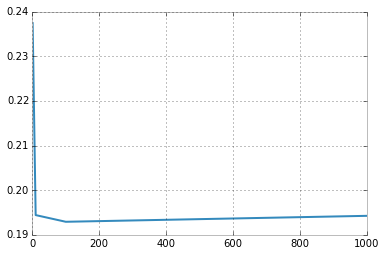

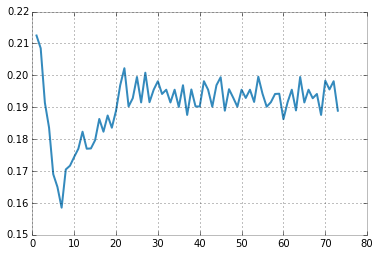

In [20]:
estim = plt.plot(estim_range,estim_errors,label='n trees')
plt.show()
depth = plt.plot(depth_range,depth_errors,label='depth')
plt.show()

In [21]:
best_forest = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth)
best_forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
predictions = best_forest.predict(X_valid)
error = np.sum(predictions!=Y_valid,dtype=float)/len(Y_valid)
print error

0.194029850746


In [23]:
best_forest.fit(train_x,train_y)
test_predictions = best_forest.predict(test_x)

In [24]:
np.savetxt('titanic_RF_lessnaive.csv',
           np.c_[test_raw['PassengerId'],test_predictions],
           delimiter=',',
           header='PassengerId,Survived',
           fmt='%d',
           comments='')

# Slight improvement over logistic regression

# More cross validation may help

In [25]:
feature_range = range(1,len(train_x.columns)+1)+['auto','log2','sqrt']
args = {'max_depth':len(train_x.columns),'n_estimators':best_estimator}
best_feature,feature_errors = cross_validation(train_x,train_y,feature_range,k=50,parameter='max_features',**args)

1 : 0.194166666667
2 : 0.196833333333
3 : 0.196916666667
4 : 0.190166666667
5 : 0.188833333333
6 : 0.190083333333
7 : 0.196833333333
8 : 0.191666666667
9 : 0.186333333333
10 : 0.189
11 : 0.192916666667
12 : 0.179666666667
13 : 0.178416666667
14 : 0.182333333333
15 : 0.186416666667
16 : 0.187666666667
17 : 0.17975
18 : 0.182166666667
19 : 0.187666666667
20 : 0.182416666667
21 : 0.175833333333
22 : 0.17975
23 : 0.183666666667
24 : 0.18225
25 : 0.183583333333
26 : 0.178416666667
27 : 0.182416666667
28 : 0.181
29 : 0.177166666667
30 : 0.175833333333
31 : 0.177166666667
32 : 0.177083333333
33 : 0.178416666667
34 : 0.181083333333
35 : 0.173083333333
36 : 0.181166666667
37 : 0.182333333333
auto : 0.194166666667
log2 : 0.192833333333
sqrt : 0.1955


In [26]:
best_feature

35

In [27]:
best_forest = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,max_features=best_feature)
best_forest.fit(X_train,Y_train)
predictions = best_forest.predict(X_valid)
error = np.sum(predictions!=Y_valid,dtype=float)/len(Y_valid)
print error

0.171641791045


In [28]:
best_forest.fit(train_x,train_y)
test_predictions = best_forest.predict(test_x)

In [29]:
np.savetxt('titanic_RF_xv3.csv',
           np.c_[test_raw['PassengerId'],test_predictions],
           delimiter=',',
           header='PassengerId,Survived',
           fmt='%d',
           comments='')

In [30]:
penalty_functions = ['gini','entropy']
args = {'max_depth':best_depth,'n_estimators':best_estimator,'max_features':best_feature}
best_function,function_errors = cross_validation(train_x,train_y,penalty_functions,k=50,parameter='criterion',**args)

gini : 0.15825
entropy : 0.16375


In [31]:
best_forest = RandomForestClassifier(n_estimators=best_estimator,
                                     max_depth=best_depth,
                                     max_features=best_feature,
                                     criterion=best_function)
best_forest.fit(X_train,Y_train)
predictions = best_forest.predict(X_valid)
error = np.sum(predictions!=Y_valid,dtype=float)/len(Y_valid)
print error

0.171641791045


In [32]:
best_forest.fit(train_x,train_y)
test_predictions = best_forest.predict(test_x)

In [33]:
np.savetxt('titanic_RF_xv4.csv',
           np.c_[test_raw['PassengerId'],test_predictions],
           delimiter=',',
           header='PassengerId,Survived',
           fmt='%d',
           comments='')

#Begin Feature Engineering

### Trying single features as predictors

In [34]:
features = X_train.columns

In [36]:
single_feature_error = []
for feat in features:
    single_forest = RandomForestClassifier(n_estimators=best_estimator,
                                           criterion=best_function)
    single_forest.fit(X_train[[feat]],Y_train)
    predicts = single_forest.predict(X_valid[[feat]])
    err = np.sum(predicts!=Y_valid,dtype=float)/len(Y_valid)
    single_feature_error.append(err)
    print feat,':',err
best_1 = features[np.argmin(single_feature_error)]
print 'Best Single Feature:',best_1

Pclass : 0.298507462687
Age : 0.39552238806
SibSp : 0.365671641791
Parch : 0.380597014925
Fare : 0.313432835821
Sex_male : 0.223880597015
Sex_female : 0.223880597015
Embarked_S : 0.410447761194
Embarked_C : 0.373134328358
Embarked_Q : 0.410447761194
Embarked_nan : 0.410447761194
Cabin_nan : 0.410447761194
Cabin_C : 0.365671641791
Cabin_E : 0.402985074627
Cabin_G : 0.417910447761
Cabin_D : 0.365671641791
Cabin_A : 0.410447761194
Cabin_B : 0.365671641791
Cabin_F : 0.402985074627
Cabin_T : 0.410447761194
Title_Mr. : 0.268656716418
Title_Mrs. : 0.305970149254
Title_Miss. : 0.335820895522
Title_Master. : 0.402985074627
Title_Don. : 0.410447761194
Title_Rev. : 0.410447761194
Title_Dr. : 0.410447761194
Title_Mme. : 0.410447761194
Title_Ms. : 0.410447761194
Title_Major. : 0.410447761194
Title_Lady. : 0.410447761194
Title_Sir. : 0.410447761194
Title_Mlle. : 0.410447761194
Title_Col. : 0.417910447761
Title_Capt. : 0.410447761194
Title_the : 0.410447761194
Title_Jonkheer. : 0.410447761194
Best Si

In [37]:
features_2 = features.drop(best_1)

In [38]:
double_feature_error = []
for feat in features_2:
    if feat == best_1: continue
    double_forest = RandomForestClassifier(n_estimators=best_estimator,criterion=best_function)
    double_forest.fit(X_train[[best_1,feat]],Y_train)
    predicts = double_forest.predict(X_valid[[best_1,feat]])
    err = np.sum(predicts!=Y_valid,dtype=float)/len(Y_valid)
    double_feature_error.append(err)
    print feat,':',err
best_2 = features_2[np.argmin(double_feature_error)]
print 'Best Double Feature:',[best_1,best_2]

Pclass : 0.201492537313
Age : 0.216417910448
SibSp : 0.208955223881
Parch : 0.208955223881
Fare : 0.186567164179
Sex_female : 0.223880597015
Embarked_S : 0.223880597015
Embarked_C : 0.223880597015
Embarked_Q : 0.223880597015
Embarked_nan : 0.223880597015
Cabin_nan : 0.223880597015
Cabin_C : 0.223880597015
Cabin_E : 0.231343283582
Cabin_G : 0.223880597015
Cabin_D : 0.223880597015
Cabin_A : 0.223880597015
Cabin_B : 0.223880597015
Cabin_F : 0.223880597015
Cabin_T : 0.223880597015
Title_Mr. : 0.268656716418
Title_Mrs. : 0.223880597015
Title_Miss. : 0.223880597015
Title_Master. : 0.216417910448
Title_Don. : 0.223880597015
Title_Rev. : 0.223880597015
Title_Dr. : 0.223880597015
Title_Mme. : 0.223880597015
Title_Ms. : 0.223880597015
Title_Major. : 0.223880597015
Title_Lady. : 0.223880597015
Title_Sir. : 0.223880597015
Title_Mlle. : 0.223880597015
Title_Col. : 0.231343283582
Title_Capt. : 0.223880597015
Title_the : 0.223880597015
Title_Jonkheer. : 0.223880597015
Best Double Feature: ['Sex_male'

In [39]:
features_3 = features.drop([best_1,best_2])

In [40]:
triple_feature_error = []
for feat in features_3:
    if feat in [best_1,best_2]: continue
    triple_forest = RandomForestClassifier(n_estimators=best_estimator,criterion=best_function)
    triple_forest.fit(X_train[[best_1,best_2,feat]],Y_train)
    predicts = triple_forest.predict(X_valid[[best_1,best_2,feat]])
    err = np.sum(predicts!=Y_valid,dtype=float)/len(Y_valid)
    triple_feature_error.append(err)
    print feat,':',err
best_3 = features_3[np.argmin(triple_feature_error)]
print 'Best Triple Feature:',[best_1,best_2,best_3]

Pclass : 0.164179104478
Age : 0.223880597015
SibSp : 0.208955223881
Parch : 0.171641791045
Sex_female : 0.186567164179
Embarked_S : 0.201492537313
Embarked_C : 0.186567164179
Embarked_Q : 0.194029850746
Embarked_nan : 0.186567164179
Cabin_nan : 0.186567164179
Cabin_C : 0.186567164179
Cabin_E : 0.186567164179
Cabin_G : 0.186567164179
Cabin_D : 0.201492537313
Cabin_A : 0.186567164179
Cabin_B : 0.201492537313
Cabin_F : 0.171641791045
Cabin_T : 0.186567164179
Title_Mr. : 0.186567164179
Title_Mrs. : 0.246268656716
Title_Miss. : 0.238805970149
Title_Master. : 0.164179104478
Title_Don. : 0.186567164179
Title_Rev. : 0.186567164179
Title_Dr. : 0.194029850746
Title_Mme. : 0.186567164179
Title_Ms. : 0.186567164179
Title_Major. : 0.194029850746
Title_Lady. : 0.186567164179
Title_Sir. : 0.186567164179
Title_Mlle. : 0.194029850746
Title_Col. : 0.186567164179
Title_Capt. : 0.194029850746
Title_the : 0.186567164179
Title_Jonkheer. : 0.194029850746
Best Triple Feature: ['Sex_male', 'Fare', 'Pclass']


In [41]:
three_forest = RandomForestClassifier(n_estimators=best_estimator,criterion=best_function)
three_forest.fit(train_x[[best_1,best_2,best_3]],train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
test_predictions_3 = three_forest.predict(test_x[[best_1,best_2,best_3]])
np.savetxt('titanic_RF_three.csv',
           np.c_[test_raw['PassengerId'],test_predictions_3],
           delimiter=',',
           header='PassengerId,Survived',
           fmt='%d',
           comments='')

In [167]:
print np.sum(test_predictions_3 != test_predictions)

46
